<a href="https://colab.research.google.com/github/miabrahams/dsml-take-home/blob/main/Copy_of_DSML_Take_Home_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codesmith Take Home Challenge

For this take home challenge you will be using foundational data science python libraries to analyze a dataset related to diabetes patients and develop a basic logistic regression model.

The libraries we will be using are:
 - [Pandas](https://pandas.pydata.org/)
 - [Sklearn](https://scikit-learn.org/stable/)
 - [Matplotlib](https://www.w3schools.com/python/matplotlib_pyplot.asp)
 - [Numpy](https://numpy.org/)

The data is collected from the Behavioral Risk Factor Surveillance System (BRFSS) dataset and provided by [Kaggle](https://www.kaggle.com/competitions/diabetes-prediction-competitiontfug-chd-nov-2022/data). You can view the raw data [here](https://raw.githubusercontent.com/CodesmithLLC/dsml-datasets/main/train_dataset.csv).

Submit your answers to the prompts [here](https://forms.gle/66VdMARikw7BAYs97)

## Getting Started
- Make a copy of this notebook and name `DSML_Admissions_{Your Initials}.py` (File -> Save a Copy in Drive)
- Complete the challenges below. Answer each question in a separate cell.
- Submit your answers questions in the take home form.

## Challenge 1
Use the pandas library to explore the provided dataset and answer the questions in the Google Form.

## Do's and Don'ts

Only use Pandas to gather information about this dataset. Do not load the data file with an external program like Excel or Google Sheet.

In [ ]:
%%capture
!python3 -m pip install --upgrade pip setuptools wheel request
!pip3 install pandas sklearn matplotlib numpy

In [ ]:
import pandas as pd

In [ ]:
train_dataset = pd.read_csv('https://raw.githubusercontent.com/CodesmithLLC/dsml-datasets/main/train_dataset.csv')
train_dataset

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,5.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0
1,11.0,0.0,1.0,1.0,39.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,20.0,30.0,1.0,1.0,1.0,1.0
2,11.0,0.0,0.0,1.0,20.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
3,10.0,1.0,1.0,1.0,34.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,0.0,30.0,1.0,1.0,1.0,0.0
4,7.0,1.0,1.0,1.0,33.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58288,9.0,1.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,1.0,1.0,0.0
58289,8.0,1.0,0.0,1.0,27.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0
58290,9.0,1.0,0.0,1.0,36.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,30.0,1.0,1.0,1.0,0.0
58291,9.0,1.0,0.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# write pandas code here to answer Part 1 questions
ds = train_dataset.describe()


# 1.
print(f"Min BMI: {ds['BMI']['min']}    Max BMI: {ds['BMI']['max']}")

# 2.
print(f"High cholesterol: {train_dataset['HighChol'].sum(): n}")

# 3.
print(f"Average BMI for diabetic patients who are physically active: {train_dataset[(train_dataset['Diabetes'] == 1) & (train_dataset['PhysActivity'] == 1)]['BMI'].mean(): .1f}")

# 4.
print(f"Highest diabetes prevalence in age group: {train_dataset.groupby(['Age'])['Diabetes'].mean().sort_values().index[-1]: n}")


Min BMI: 12.0    Max BMI: 98.0
High cholesterol:  31177
Average BMI for diabetic patients who are physically active:  31.3
Highest diabetes prevalence in age group:  11


## Challenge 2

Now that we have some familiarity with this dataset, we'll train a simple [logistic regression](https://www.youtube.com/watch?v=yIYKR4sgzI8) model using the Scikit-learn library. Your main task is to generate evaluation metrics to assess the model's performance, while the code for training the logistic model has been provided for you.

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

In [ ]:
model = LogisticRegression()

In [ ]:
test_dataset = pd.read_csv('https://raw.githubusercontent.com/CodesmithLLC/dsml-datasets/main/test_dataset.csv')

In [ ]:
train_X = train_dataset[['BMI', 'GenHlth', 'Age']]
train_Y = train_dataset[['Diabetes']].values.reshape(-1)

In [ ]:
model.fit(train_X, train_Y)

LogisticRegression()

F1 score:  0.42
β_BMI:  0.07
β_GenHlth:  0.668
β_Age:  0.20343


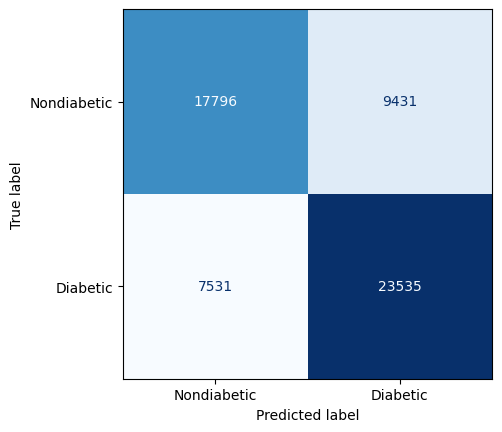

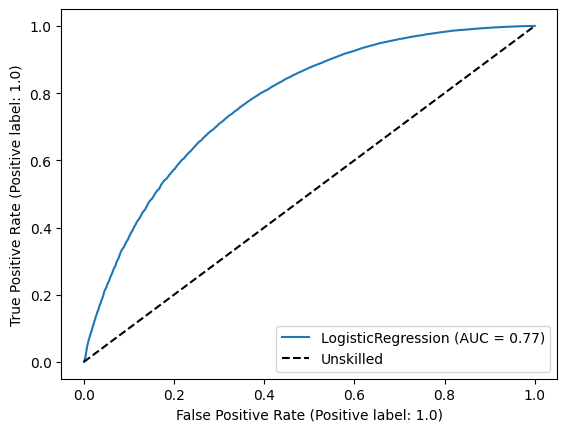

In [187]:
# write code here to answer questions for Part 2

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, train_X, train_Y, display_labels=['Nondiabetic', 'Diabetic'], colorbar=False, cmap='Blues')

# ROC Curve
RocCurveDisplay.from_estimator(model, train_X, train_Y)
line, = plt.plot([0, 1], [0, 1], 'k--', label="Unskilled")
plt.legend()


# F1 score
cm = confusion_matrix(train_Y, model.predict(train_X))
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[0,0]
precision = FP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2 * precision * recall / (precision + recall)
print(f"F1 score: {F1: .2f}")

# Pretty print coefficients
BMI_coef, GenHlth_coef, Age_coef = model.coef_[0]
print(f"β_BMI: {BMI_coef: 1.2f}")
print(f"β_GenHlth: {GenHlth_coef: 2.3f}"
print(f"β_Age: {Age_coef: 0.5}")




## Challenge 3

1.   List item
2.   List item



Solve the following question just using python:

- Total number of words. Strings like `a.k.a` and `e.g.` should be considered a single word
- Total number of unique words. `"spam"` and `spam` should be considered the same word
- What is the most frequent word that appears in the below text (case insenstive)? Exclude stop words (e.g `and`, `or`, `the`). A list of stop words have been provided.

## Do's and Don'ts

Do not download (`pip install`) any external libs to solve this problem. Just use python and any built-in modules you may need.

In [ ]:
# source: https://sites.astro.caltech.edu/~george/ay122/cacm12.pdf
TEXT = '''
Machine learning systems automatically learn programs from
data. This is often a very attractive alternative to manually
constructing them, and in the last decade the use of machine
learning has spread rapidly throughout computer science
and beyond. Machine learning is used in Web search, spam
filters, recommender systems, ad placement, credit scoring,
fraud detection, stock trading, drug design, and many other
applications. A recent report from the McKinsey Global Institute asserts that machine learning (a.k.a. data mining or
predictive analytics) will be the driver of the next big wave of
innovation [15]. Several fine textbooks are available to interested practitioners and researchers (e.g, [16, 24]). However,
much of the “folk knowledge” that is needed to successfully
develop machine learning applications is not readily available in them. As a result, many machine learning projects
take much longer than necessary or wind up producing lessthan-ideal results. Yet much of this folk knowledge is fairly
easy to communicate. This is the purpose of this article.
Many different types of machine learning exist, but for illustration purposes I will focus on the most mature and
widely used one: classification. Nevertheless, the issues I
will discuss apply across all of machine learning. A classifier is a system that inputs (typically) a vector of discrete
and/or continuous feature values and outputs a single discrete value, the class. For example, a spam filter classifies
email messages into “spam” or “not spam,” and its input may
be a Boolean vector x = (x1, . . . , xj , . . . , xd), where xj = 1
if the jth word in the dictionary appears in the email and
xj = 0 otherwise. A learner inputs a training set of examples (xi, yi), where xi = (xi,1, . . . , xi,d) is an observed input
and yi is the corresponding output, and outputs a classifier.
The test of the learner is whether this classifier produces the
correct output yt for future examples xt (e.g., whether the
spam filter correctly classifies previously unseen emails as
spam or not spam).
'''

STOP_WORDS = ['a', 'an', 'the', 'in', 'on', 'at', 'for', 'is', 'it', 'and', 'or', 'but', 'with', 'of', 'to']

In [193]:
# Write your code here
import re
from collections import Counter

# Clean whitespace
TEXT_Clean = re.compile(r"\s+").sub(' ', TEXT.lower())

# Remove non-alphanumeric characters (note: will turn e.g. into eg and [15] into 15)
TEXT_Clean = re.compile('[^a-zA-Z \n]+').sub('', TEXT_Clean)

# Split into words
Words = [w for w in TEXT_Clean.split(' ') if w]
print(f"There are {len(Words)} words in the text.")

# Count most common words
common_words = Counter(Words).most_common()
print(f"There are {len(common_words)} unique words in the text.")

# Third most common word, excluding stop words
third_common = [w for w in common_words if w[0] not in STOP_WORDS][2]
print(f"The third most common word is '{third_common[0]}', with {third_common[1]} occurrences.")


There are 320 words in the text.
There are 184 unique words in the text.
The third most common word is 'spam', with 7 occurrences.


## Challenge 4

Solve the following question using numpy. Your answer should pass all the tests below.


In [184]:
import numpy as np

# Write a function called find_closest_vector that takes a vector and a list of vectors (i.e. a matrix) as input arguments,
# and returns the row of the matrix that is closest to the input vector (in terms of Euclidean distance).
# You can use the function np.linalg.norm to compute the Euclidean distance between two vectors.
# Example: find_closest_vector(np.array([1, 2]), np.array([[1, 1], [3, 4]])) should return np.array([1, 1]).
# Example: find_closest_vector(np.array([1, 2, 3]), np.array([[1, 1, 1], [3, 4, 5], [2, 2, 2]])) should return np.array([2, 2, 2]).
def find_closest_vector(x: np.array, vectors: list):
  min_distance = float('inf')
  closest_vector = None
  for v in vectors:
    distance = np.linalg.norm(x - v)
    if distance < min_distance:
      min_distance = distance
      closest_vector = v
  return closest_vector

assert (find_closest_vector(np.array([1, 2]), np.array([[1, 1], [3, 4]])) == np.array([1, 1])).all()
assert (find_closest_vector(np.array([1, 2, 3]), np.array([[1, 1, 1], [3, 4, 5], [2, 2, 2]])) == np.array([2, 2, 2])).all()
print('All tests have passed!')

All tests have passed!
